In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [2]:
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []

In [3]:
image_files = [f for f in glob.glob('dataset/**/*', recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [4]:
len(image_files)

4540

In [5]:
for img in image_files:

    image = cv2.imread(img)
    try:
        image = cv2.resize(image, (img_dims[0],img_dims[1]))
        image = img_to_array(image)
        data.append(image)
    except Exception as e:
        continue
    label = img.split(os.path.sep)[-2] # C:\Files\gender_dataset_face\woman\face_1162.jpg
    if label == "without_mask":
        label = 1
    else:
        label = 0
        
    labels.append([label])

In [6]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [7]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

In [8]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [9]:
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model


In [10]:
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

# compile the model
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

c:\users\francis\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:367: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

c:\users\francis\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
56/56 [==============================] - 36s 627ms/step - loss: 0.4730 - accuracy: 0.8436 - val_loss: 1.7796 - val_accuracy: 0.5420
Epoch 2/100
56/56 [==============================] - 35s 614ms/step - loss: 0.2713 - accuracy: 0.9017 - val_loss: 2.2227 - val_accuracy: 0.5420
Epoch 3/100
56/56 [==============================] - 36s 637ms/step - loss: 0.2638 - accuracy: 0.9062 - val_loss: 2.0134 - val_accuracy: 0.5420
Epoch 4/100
56/56 [==============================] - 35s 616ms/step - loss: 0.2153 - accuracy: 0.9239 - val_loss: 1.0783 - val_accuracy: 0.6139
Epoch 5/100
56/56 [==============================] - 35s 619ms/step - loss: 0.1833 - accuracy: 0.9343 - val_loss: 0.7969 - val_accuracy: 0.7190
Epoch 6/100
56/56 [==============================] - 35s 620ms/step - loss: 0.1933 - accuracy: 0.9315 - val_loss: 0.6273 - val_accuracy: 0.7854
Epoch 7/100
56/56 [==============================] - 35s 616ms/step - loss: 0.1720 - accuracy: 0.9377 - val_loss: 0.6789 - val_accuracy:

56/56 [==============================] - 34s 599ms/step - loss: 0.0440 - accuracy: 0.9814 - val_loss: 0.3455 - val_accuracy: 0.8982
Epoch 58/100
56/56 [==============================] - 34s 598ms/step - loss: 0.0434 - accuracy: 0.9853 - val_loss: 0.0376 - val_accuracy: 0.9889
Epoch 59/100
56/56 [==============================] - 36s 650ms/step - loss: 0.0475 - accuracy: 0.9842 - val_loss: 0.0606 - val_accuracy: 0.9790
Epoch 60/100
56/56 [==============================] - 34s 606ms/step - loss: 0.0370 - accuracy: 0.9873 - val_loss: 0.0719 - val_accuracy: 0.9812
Epoch 61/100
56/56 [==============================] - 34s 601ms/step - loss: 0.0411 - accuracy: 0.9839 - val_loss: 0.5237 - val_accuracy: 0.8739
Epoch 62/100
56/56 [==============================] - 34s 603ms/step - loss: 0.0353 - accuracy: 0.9870 - val_loss: 0.1444 - val_accuracy: 0.9524
Epoch 63/100
56/56 [==============================] - 34s 603ms/step - loss: 0.0268 - accuracy: 0.9910 - val_loss: 0.4119 - val_accuracy: 0.870

In [12]:
model.save('mask_detection_v3.model')

INFO:tensorflow:Assets written to: mask_detection_v3.model\assets


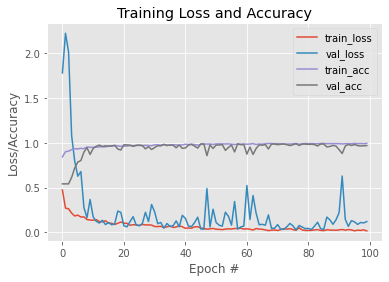

In [13]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')